# Rendu Projet Annuel 2019 - 2020

## Intervenant : Nicolas VIDAL


## Auteurs: 
- Natane BENDAVID
- Louis TARDY
- Cheikh Abdourahmane WADE


In [10]:
import matplotlib.pyplot as plt
import numpy as np
from ctypes import *

#### Importation de librairie Rust

In [153]:
my_dll_path = "D:/PA-MachineLearning-3ESGI/Project/Lib/MachineLearning/target/debug/machine_learning_c.dll"

ml_lib = CDLL(my_dll_path)

#### Convertir les tableaux numpy en liste python

In [138]:
def convertNpArrayToList(npArray):
    res = list()
    for elem in npArray:
        res = res + elem.tolist()
    return res

# Cas de tests, rendu 2

## Classification

### Linear Simple :
        Linear Model : OK
        MLP (2, 1)   : OK

In [141]:
X = np.array([
      [1, 1],
      [2, 3],
      [3, 3]
])
Y = np.array([
      1,
      -1,
      -1
])

list_x_classification = convertNpArrayToList(X)
list_y_classification = Y.tolist()

c_array_x_classification = (c_double * len(list_x_classification))(*list_x_classification)
c_array_y_classification = (c_double * len(list_y_classification))(*list_y_classification)
ml_lib.test_linear_model_classification_python.restype = POINTER(c_double)
response = (ml_lib.test_linear_model_classification_python(c_array_x_classification, len(list_x_classification), 2, c_array_y_classification, len(list_y_classification)))
for i in range(len(list_y_classification)):
    print(response[i])

1.0
-1.0
-1.0


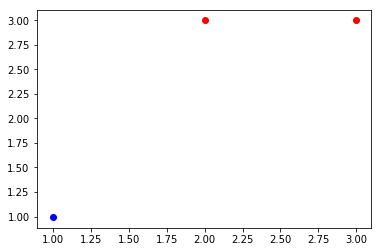

<Figure size 432x288 with 0 Axes>

In [125]:
plt.scatter(X[0, 0], X[0, 1], color='blue')
plt.scatter(X[1:3,0], X[1:3,1], color='red')
plt.show()
plt.clf()

### Linear Multiple :
        Linear Model : OK
        MLP (2, 1)   : OK

In [183]:
X = np.concatenate([np.random.random((50,2)) * 0.9 + np.array([1, 1]), np.random.random((50,2)) * 0.9 + np.array([2, 2])], axis = 0)
Y = np.concatenate([np.ones((50, 2)), np.ones((50, 2)) * -1.0])

X_array = list()
Y_array = list()
for elem in X:
    X_array = X_array + elem.tolist()
for elem in Y:
    Y_array = Y_array + elem.tolist()

X_dim = X.shape[1]

c_array_x_classification = (c_double * len(X_array))(*X_array)
c_array_y_classification = (c_double * len(Y_array))(*Y_array)
ml_lib.test_linear_model_classification_python.restype = POINTER(c_double)
response = ml_lib.test_linear_model_classification_python(c_array_x_classification, len(X_array), X_dim, c_array_y_classification, len(Y_array))

result = list()
for i in range(len(Y_array)):
    result.append(response[i])
print(result)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.1685338757447505, 2.2073638067817267, 2.27984335720723, 2.0978951942417234, 2.5873936837728335, 2.2005346981219702, 2.422793107060503, 2.557650325806324, 2.201940165773038, 2.2820862315248682, 2.24205239499232, 2.30998594788812, 2.783794586024472, 2.4601651257013386, 2.117129345046333, 2.472348971979561, 2.352236166366158, 2.842260632237943, 2.7567503423202044, 2.7118633754663883, 2.520743718969694, 2.7210723758278, 2.5054892460907676, 2.5179123261229703, 2.0479783545721637, 2.879428081923211

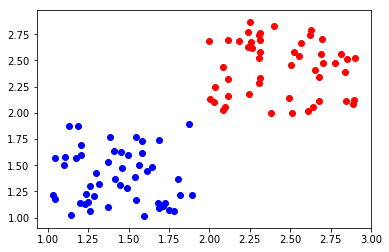

<Figure size 432x288 with 0 Axes>

In [93]:
plt.scatter(X[0:50, 0], X[0:50, 1], color='blue')
plt.scatter(X[50:100,0], X[50:100,1], color='red')
plt.show()
plt.clf()

### XOR :
        Linear Model    : KO
        MLP (2, 2, 1)   : OK

In [203]:
X = np.array([[1, 0], [0, 1], [0, 0], [1, 1]])
Y = np.array([1, 1, -1, -1])

list_x_classification = convertNpArrayToList(X)
list_y_classification = Y.tolist()

c_array_x_classification = (c_double * len(list_x_classification))(*list_x_classification)
c_array_y_classification = (c_double * len(list_y_classification))(*list_y_classification)
ml_lib.test_linear_model_classification_python.restype = POINTER(c_double)
response = (ml_lib.test_linear_model_classification_python(c_array_x_classification, len(list_x_classification), 2, c_array_y_classification, len(list_y_classification)))

res = list()
for i in range(len(list_y_classification)):
    res.append(response[i])
print(res)

[1.0, 1.0, -1.0, 1.0]


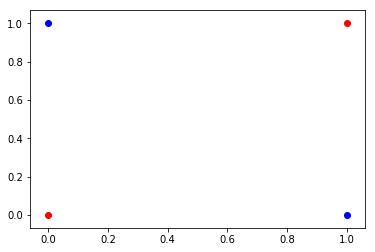

<Figure size 432x288 with 0 Axes>

In [97]:
plt.scatter(X[0:2, 0], X[0:2, 1], color='blue')
plt.scatter(X[2:4,0], X[2:4,1], color='red')
plt.show()
plt.clf()

### Cross :
        Linear Model    : KO
        MLP (2, 4, 1)   : OK

In [188]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([1 if abs(p[0]) <= 0.3 or abs(p[1]) <= 0.3 else -1 for p in X])

list_x_classification = convertNpArrayToList(X)
list_y_classification = Y.tolist()

c_array_x_classification = (c_double * len(list_x_classification))(*list_x_classification)
c_array_y_classification = (c_double * len(list_y_classification))(*list_y_classification)
ml_lib.test_linear_model_classification_python.restype = POINTER(c_double)
response = (ml_lib.test_linear_model_classification_python(c_array_x_classification, len(list_x_classification), 2, c_array_y_classification, len(list_y_classification)))

res = list()
for i in range(len(list_y_classification)):
    res.append(response[i])
print(res)


[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, -1.0, -1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0

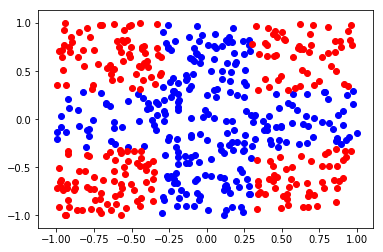

<Figure size 432x288 with 0 Axes>

In [131]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,1], color='red')
plt.show()
plt.clf()

### Multi Linear 3 classes :
        Linear Model x3 : OK
        MLP (2, 3)      : OK

In [202]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([[1, 0, 0] if -p[0] - p[1] - 0.5 > 0 and p[1] < 0 and p[0] - p[1] - 0.5 < 0 else 
              [0, 1, 0] if -p[0] - p[1] - 0.5 < 0 and p[1] > 0 and p[0] - p[1] - 0.5 < 0 else 
              [0, 0, 1] if -p[0] - p[1] - 0.5 < 0 and p[1] < 0 and p[0] - p[1] - 0.5 > 0 else 
              [0, 0, 0]for p in X])

list_x_classification = list()
list_y_classification = list()
for elem in X:
    list_x_classification = list_x_classification + elem.tolist()
for elem in Y:
    list_y_classification = list_y_classification + elem.tolist()

X_dim = X.shape[1]

c_array_x_classification = (c_double * len(list_x_classification))(*list_x_classification)
c_array_y_classification = (c_double * len(list_y_classification))(*list_y_classification)
ml_lib.test_linear_model_classification_python.restype = POINTER(c_double)
response = ml_lib.test_linear_model_classification_python(c_array_x_classification, len(list_x_classification), X_dim, c_array_y_classification, len(list_y_classification))

result = list()
for i in range(len(list_y_classification)):
    result.append(response[i])
print(result)

[1.0, 1.0, -1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, 1.0, -1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0,

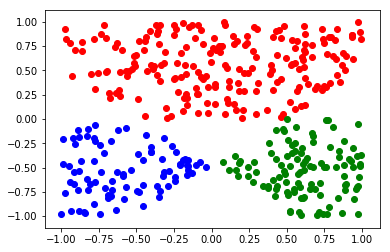

<Figure size 432x288 with 0 Axes>

In [133]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

### Multi Cross :
        Linear Model x3 : KO
        MLP (2, ?, ?, 3): OK

In [201]:
X = np.random.random((1000, 2)) * 2.0 - 1.0
Y = np.array([[1, 0, 0] if abs(p[0] % 0.5) <= 0.25 and abs(p[1] % 0.5) > 0.25 else [0, 1, 0] if abs(p[0] % 0.5) > 0.25 and abs(p[1] % 0.5) <= 0.25 else [0, 0, 1] for p in X])

list_x_classification = list()
list_y_classification = list()
for elem in X:
    list_x_classification = list_x_classification + elem.tolist()
for elem in Y:
    list_y_classification = list_y_classification + elem.tolist()

X_dim = X.shape[1]

c_array_x_classification = (c_double * len(list_x_classification))(*list_x_classification)
c_array_y_classification = (c_double * len(list_y_classification))(*list_y_classification)
ml_lib.test_linear_model_classification_python.restype = POINTER(c_double)
response = ml_lib.test_linear_model_classification_python(c_array_x_classification, len(list_x_classification), X_dim, c_array_y_classification, len(list_y_classification))

result = list()
for i in range(len(list_y_classification)):
    result.append(response[i])
print(result)

[-1.0, -1.0, -1.0, 1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 1.0, 1.0, -1.0, 1.0, -1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, 1.0, 1.0

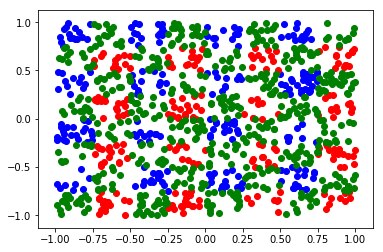

<Figure size 432x288 with 0 Axes>

In [136]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

## Régression

### Linear Simple 2D :
        Linear Model : OK
        MLP (1, 1)   : OK

In [166]:
X = np.array([
      [1],
      [2]
])
Y = np.array([
      2,
      3
])

list_x_regression = convertNpArrayToList(X)
list_y_regression = Y.tolist()

c_array_x_regression = (c_double * len(list_x_regression))(*list_x_regression)
c_array_y_regression = (c_double * len(list_y_regression))(*list_y_regression)
ml_lib.test_linear_model_regression_python.restype = POINTER(c_double)
response = ml_lib.test_linear_model_regression_python(c_array_x_regression, len(list_x_regression), 1, c_array_y_regression, len(list_y_regression))
res = list()
for i in range(len(list_y_regression)):
    res.append(response[i])
print(res)


[3.2, 4.800000000000001]


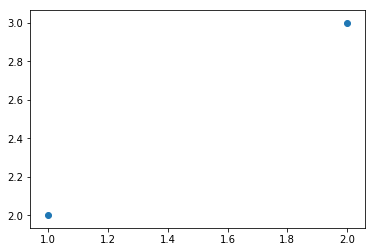

<Figure size 432x288 with 0 Axes>

In [138]:
plt.scatter(X,Y)
plt.show()
plt.clf()

### Non Linear Simple 2D :
        Linear Model    : OK
        MLP (1, ?, 1)   : OK

In [165]:
X = np.array([
      [1],
      [2],
      [3]
])
Y = np.array([
      2,
      3,
      2.5
])

list_x_regression = convertNpArrayToList(X)
list_y_regression = Y.tolist()

c_array_x_regression = (c_double * len(list_x_regression))(*list_x_regression)
c_array_y_regression = (c_double * len(list_y_regression))(*list_y_regression)
ml_lib.test_linear_model_regression_python.restype = POINTER(c_double)
response = ml_lib.test_linear_model_regression_python(c_array_x_regression, len(list_x_regression), 1, c_array_y_regression, len(list_y_regression))
res = list()
for i in range(len(list_y_regression)):
    res.append(response[i])
print(res)

[2.2142857142857144, 3.3214285714285716, 4.428571428571429]


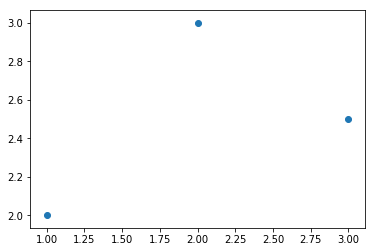

<Figure size 432x288 with 0 Axes>

In [140]:
plt.scatter(X,Y)
plt.show()
plt.clf()

### Linear Simple 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

In [159]:
X = np.array([
      [1, 1],
      [2, 2],
      [3, 1]
])
Y = np.array([
      2,
      3,
      2.5
])

X_array = list()
for elem in X:
    X_array = X_array + elem.tolist()

Y_array = Y.tolist()
X_dim = X.shape[1]

print(X_array, Y_array, X_dim)

c_array_x_classification = (c_double * len(X_array))(*X_array)
c_array_y_classification = (c_double * len(Y_array))(*Y_array)
ml_lib.test_linear_model_regression_python.restype = POINTER(c_double)
response = ml_lib.test_linear_model_regression_python(c_array_x_classification, len(X_array), X_dim, c_array_y_classification, len(Y_array))

result = list()
for i in range(len(Y_array)):
    result.append(response[i])
print(result)

[1, 1, 2, 2, 3, 1] [2.0, 3.0, 2.5] 2
[2.049999999999998, 3.649999999999997, 2.949999999999997]


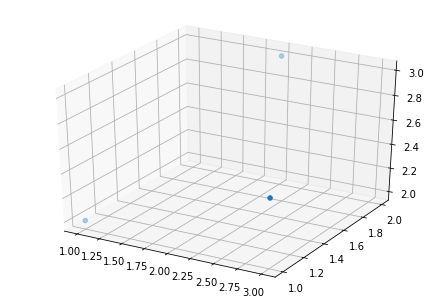

<Figure size 432x288 with 0 Axes>

In [142]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()

### Linear Tricky 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

In [0]:
X = np.array([
      [1, 1],
      [2, 2],
      [3, 3]
])
Y = np.array([
      1,
      2,
      3
])

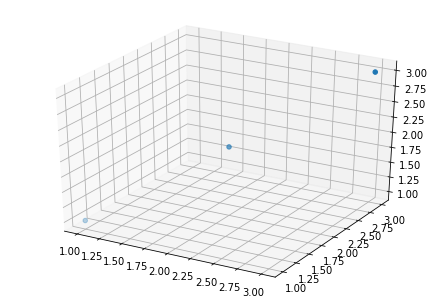

<Figure size 432x288 with 0 Axes>

In [144]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()

### Non Linear Simple 3D :
        Linear Model       : KO
        MLP (2, 2, 1)      : OK

In [175]:
X = np.array([
      [1, 0],
      [0, 1],
      [1, 1],
      [0, 0],
])
Y = np.array([
      2,
      1,
      -2,
      -1
])

X_array = list()
for elem in X:
    X_array = X_array + elem.tolist()

Y_array = Y.tolist()
X_dim = X.shape[1]

print(X_array, Y_array, X_dim)

c_array_x_classification = (c_double * len(X_array))(*X_array)
c_array_y_classification = (c_double * len(Y_array))(*Y_array)
ml_lib.test_linear_model_regression_python.restype = POINTER(c_double)
response = ml_lib.test_linear_model_regression_python(c_array_x_classification, len(X_array), X_dim, c_array_y_classification, len(Y_array))

result = list()
for i in range(len(Y_array)):
    result.append(response[i])
print(result)

[1, 0, 0, 1, 1, 1, 0, 0] [2, 1, -2, -1] 2
[0.6666666666666667, -0.33333333333333326, 1.1102230246251565e-16, 0.33333333333333337]


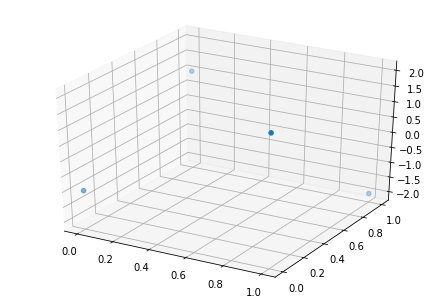

<Figure size 432x288 with 0 Axes>

In [146]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()